<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Augmentation</a></span></li><li><span><a href="#Input-pipeline" data-toc-modified-id="Input-pipeline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Input pipeline</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Scrap" data-toc-modified-id="Scrap-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scrap</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Save-model" data-toc-modified-id="Save-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Save-architecture" data-toc-modified-id="Save-architecture-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Save architecture</a></span></li><li><span><a href="#Save-weights" data-toc-modified-id="Save-weights-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Save weights</a></span></li></ul></li><li><span><a href="#Inference-Model" data-toc-modified-id="Inference-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Inference Model</a></span><ul class="toc-item"><li><span><a href="#Save-model" data-toc-modified-id="Save-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Save-architecture" data-toc-modified-id="Save-architecture-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Save architecture</a></span></li><li><span><a href="#Save-weights" data-toc-modified-id="Save-weights-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Save weights</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

# Does not seem to work with TF2.0 yet
# %load_ext tensorboard
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
import tensorflow as tf

# Copied from: https://www.tensorflow.org/beta/guide/using_gpu
tf.debugging.set_log_device_placement(True)

# Adapted from: https://www.tensorflow.org/beta/guide/using_gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 1 Logical GPU


## Dataset

In [3]:
from pathlib import Path

from nucleus.dataset.detections import BasketballDetectionsDataset
from nucleus.visualize import BasketballDetectionsLabelColorMap

In [4]:
cache = Path('/data1/joan/nucleus_cache/')

In [5]:
dataset = BasketballDetectionsDataset.load(
    path=cache / 'basketball_detections/basketball_detections.json'
)

Fragments already downloaded


In [8]:
dataset.convert()

Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadFile in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadFile in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadFile in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Substr in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Substr in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Substr in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DecodePng in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DecodePng in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DecodePng in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_hwc_to_chw_93521 in device <unspecified>
Executing op __inferen

Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
# img = dataset.images[0]
# box_args = dict(label_color_map=BasketballDetectionsLabelColorMap)


# img.view(box_args=box_args)

## Model

In [ ]:
from nucleus.detection import *

In [10]:
backbone_manager = Re
backbone = backbone_manager.create_model()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [11]:
detector_manager = YoloManager()
detector = detector_manager.create_model(
    backbone=backbone,
    n_features=128,
    n_classes=4
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [12]:
detector.summary(line_length=117)

Model: "yolo"
_____________________________________________________________________________________________________________________
Layer (type)                                        Output Shape                                   Param #           
dense_net121 (Model)                                (None, None, None, 1024)                       7037504           
_____________________________________________________________________________________________________________________
yolo_head (Model)                                   (None, None, None, 9, 10)                      1578714           
Total params: 8,616,218
Trainable params: 8,532,570
Non-trainable params: 83,648
_____________________________________________________________________________________________________________________


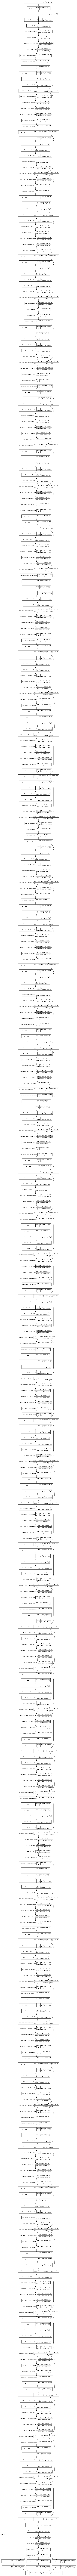

In [13]:
# Requires `graphviz` to be installed on your machine.
# * Ubuntu :  `sudo apt-get install graphviz`
# * macOS  :  `brew install graphviz`
tf.keras.utils.plot_model(
    model=detector,
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True
)

## Data Augmentation

In [14]:
from nucleus.transform import *
# There is currently a bug in TF2.0 that prevents us from using addons
# * https://github.com/tensorflow/addons/issues/277
# from nucleus.transform.geometric_addons import *

In [15]:
# transform_chainer = TransformChainer(
#     transforms=[
# #         RandomCropAroundBox(size=(540, 960), pad=False),
#         RandomApplyTransform(
#             transform=RandomZoom(pad=False),
#             op_rate=0.5
#         ),
#         RandomApplyTransform(
#             transform=RandomPixelValueScale(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustBrightness(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustContrast(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustHue(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustSaturation(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=HorizontalFlip(),
#             op_rate=0.5
#         ),
#         RandomApplyTransform(
#             transform=RandomJitterBoxes(),
#             op_rate=0.8
#         )
#     ]
# )

In [16]:
# image_transform(transform_chainer)(img).view(box_args=box_args)

## Input pipeline

In [17]:
from nucleus.detection.matcher import YoloMatcher
from nucleus.detection.anchors import create_anchors, yolo_anchor_parameters

In [18]:
# transform_chainer = TransformChainer(
#     transforms=[
# #         RandomCropAroundBox(size=(540, 960)),
#         RandomApplyTransform(
#             transform=RandomZoom(),
#             op_rate=0.5
#         ),
#         RandomApplyTransform(
#             transform=RandomPixelValueScale(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustBrightness(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustContrast(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustHue(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=RandomAdjustSaturation(),
#             op_rate=0.2
#         ),
#         RandomApplyTransform(
#             transform=HorizontalFlip(),
#             op_rate=0.5
#         ),
#         RandomApplyTransform(
#             transform=RandomJitterBoxes(),
#             op_rate=0.8
#         )
#     ]
# )

In [19]:
anchors = create_anchors(
    scales=yolo_anchor_parameters.scales,
    ratios=yolo_anchor_parameters.ratios,
    n_anchors=yolo_anchor_parameters.n_anchors,
    grid_height=34,
    grid_width=60
)

match_fn = lambda image, boxes: (
    image, 
    YoloMatcher(iou_threshold=0.1).match(boxes=boxes, anchors=anchors)
)

Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Tile in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sqrt in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0


In [19]:
# @tf.function
# def transform_fn_train(hwc, box_tensor):
#     return match_fn(*transform_chainer(hwc, box_tensor))


# @tf.function
# def transform_fn_val(hwc, box_tensor):
#     return match_fn(*RandomCropAroundBox(size=(540, 960))(hwc, box_tensor))

In [20]:
ds_train = dataset.get_ds(
    partition='val', 
    n_examples=1,
    shuffle=None,
    repeat=1000,
    batch=1,
    transform_fn=match_fn
)

ds_val = dataset.get_ds(
    partition='val', 
    n_examples=1,
    shuffle=None,
    batch=1,
    transform_fn=match_fn,
)

Executing op MatchingFiles in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Greater in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReduceJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Maximum in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ShuffleDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelInterleaveDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TakeDataset in device /job

In [21]:
# for images, matched_boxes in ds_train.take(1):
#     print(f'Train images shapes: \t\t{images.shape}')
#     print(f'Train matched boxes shapes: \t{matched_boxes.shape}')
    
# for images, matched_boxes in ds_val.take(1):
#     print(f'Val images shapes: \t\t{images.shape}')
#     print(f'Val matched boxes shapes: \t{matched_boxes.shape}')

In [22]:
# from nucleus.image import *
# from nucleus.box import *

In [23]:
# i = 0

# mask = tf.greater(tf.reduce_sum(matched_boxes[i][..., -1], axis=-1), 0)
# img = Image.from_hwc(hwc=images[i])

In [24]:
# img.view_with_grid(
#     grid_shape=mask.shape,
#     mask=mask
# )

## Train 

In [25]:
from nucleus.detection.losses import SsdLoss

In [26]:
ssd_loss = SsdLoss(n_classes=4)

In [27]:
detector.compile(
    optimizer=tf.keras.optimizers.Adam(lr=1e-4, clipnorm=0.001), 
    loss=ssd_loss,
    metrics=[
#         ssd_loss.ssd_coords_loss,
        ssd_loss.ssd_scores_loss,
#         ssd_loss.ssd_labels_loss
    ]
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [28]:
!rm -r /data1/joan/log_dir/

In [29]:
log_dir = f'/data1/joan/log_dir/{detector.name}'

tensorboard_cbk = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# Does not seem to work with TF2.0 yet
# %tensorboard --host 0.0.0.0 --port 6006 --logdir log_dir

In [ ]:
history = detector.fit(
    ds_train,
    epochs=1,
    validation_data=ds_val,
    callbacks=[tensorboard_cbk],
)

Executing op ExperimentalDatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SummaryWriter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op CreateSummaryFileWriter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op WriteGraphSummary in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalAnd in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op WriteSummary in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlushSummaryWriter in device /job:localhost/replica:0/task:0/d

## Scrap

In [184]:
for images, _ in ds_val.take(1):
    print(images.shape)

(1, 1080, 1920, 3)


In [185]:
matched_detections = detector.predict(images)

Executing op __inference_keras_scratch_graph_310339 in device <unspecified>


In [190]:
i = 0

mask = tf.reduce_any(tf.greater(matched_detections[i][..., 5], 0.5), axis=-1)
img = Image.from_hwc(hwc=images[i])

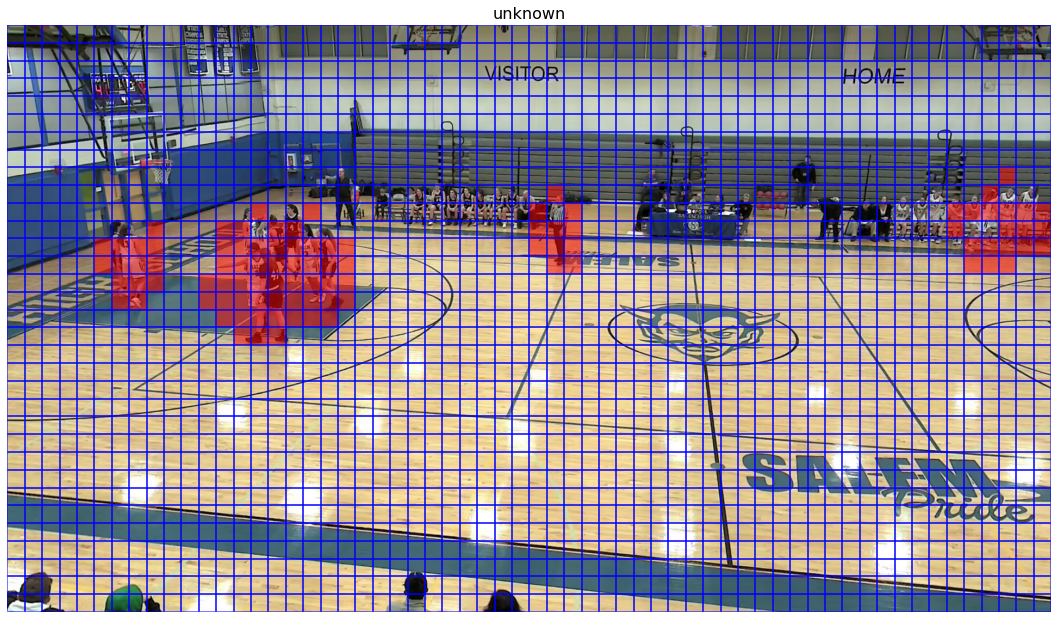

In [191]:
img.view_with_grid(
    grid_shape=mask.shape,
    mask=mask
)

In [31]:
inference_detector = detector_manager.create_inference_model(model=detector)

In [141]:
for images, _ in ds_val.take(1):
    continue

In [33]:
boxes = inference_detector.predict(images)

Executing op __inference_keras_scratch_graph_220787 in device <unspecified>


In [34]:
from nucleus.image import *
from nucleus.box import *

i = 0

box_collection = BoxCollection.from_tensor(boxes[i][..., :4], unique_labels=dataset.unique_boxes_labels)
image = Image.from_hwc(hwc=images[i], box_collection=box_collection)

Executing op __inference_hwc_to_chw_220801 in device <unspecified>


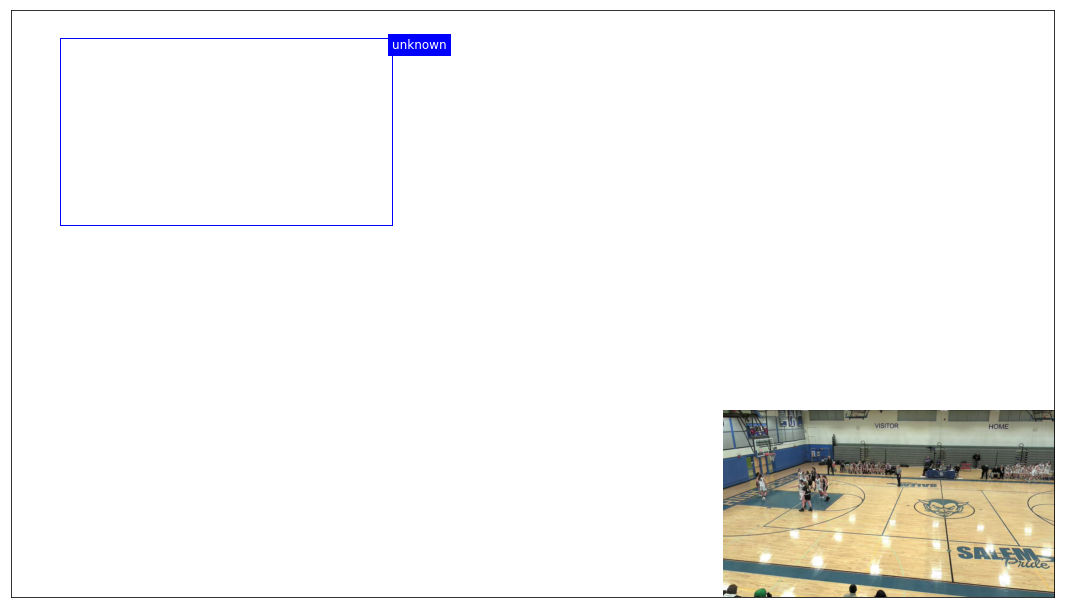

In [35]:
image.view()

In [142]:
matched_boxes = detector.predict(images)

Executing op __inference_keras_scratch_graph_227099 in device <unspecified>


In [144]:
import tensorflow as tf

i = 0

print(matched_boxes.shape)
aux = tf.reduce_sum(matched_boxes[i, ..., 4], axis=-1)
print(aux.shape)

(1, 33, 60, 9, 10)
(33, 60)


In [145]:
tf.reduce_max(aux), tf.reduce_min(aux)

Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Min in device /job:localhost/replica:0/task:0/device:GPU:0


(<tf.Tensor: id=227109, shape=(), dtype=float32, numpy=1.0000002>,
 <tf.Tensor: id=227111, shape=(), dtype=float32, numpy=0.99982446>)

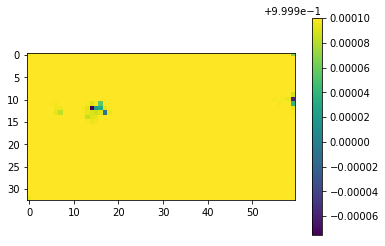

In [146]:
import matplotlib.pyplot as plt

plt.imshow(aux)
plt.colorbar()

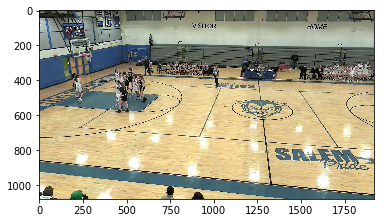

In [147]:
plt.imshow(tf.cast(images[i], dtype=tf.int32))

In [72]:
pred = detector.predict(images)

Executing op __inference_keras_scratch_graph_50766 in device <unspecified>


In [75]:
x, true = transform_fn_val(img.hwc, img.box_collection.as_tensor())

In [76]:
print(pred.shape)
print(true.shape)

(4, 8, 22, 9, 9)
(8, 22, 9, 5)


In [83]:
true[3, 5, 0]

<tf.Tensor: id=52052, shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

## Model

In [50]:
from nucleus.detection import *
from nucleus.detection.backbones.managers import *

In [4]:
backbone_manager = MobileNetManager()
backbone = backbone_manager.create_model(alpha=0.25)

/Users/joan.alabort/miniconda3/envs/nucleus_env/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [ ]:
detector_manager = YoloManager()
detector = detector_manager.create_model(
    backbone=backbone,
    n_classes=4
)

In [ ]:
detector.summary(line_length=117)

In [ ]:
tf.keras.utils.plot_model(
    model=detector,
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True
)

### Save model

In [ ]:
detector_manager.save_model(
    model=detector, 
    save_format='tf',
    custom_objects=backbone_manager.custom_objects,
    overwrite=True
)

In [ ]:
detector = detector_manager.load_model(
    save_format='tf',
    custom_objects=backbone_manager.custom_objects
)

### Save architecture

In [ ]:
detector_manager.save_model_arch(model=detector)

In [ ]:
detector = detector_manager.load_model_arch(
    custom_objects=backbone_manager.custom_objects
)

### Save weights

In [ ]:
detector_manager.save_model_weights(model=detector)

In [ ]:
detector = detector_manager.load_model_weights(model=detector)

## Inference Model

In [ ]:
matcher = detector_manager.create_matcher()

In [ ]:
inference_detector = detector_manager.create_inference_model(model=detector)

In [ ]:
inference_detector.summary(line_length=117)

In [ ]:
tf.keras.utils.plot_model(
    model=inference_detector,
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True
)

### Save model

In [ ]:
from nucleus.detection.layers import YoloInferenceLayer

In [ ]:
detector_manager.save_model(
    model=inference_detector,
    save_format='tf',
    overwrite=True,
    custom_objects={
        **backbone_manager.custom_objects,
        'YoloInferenceLayer': YoloInferenceLayer
    }
)

In [ ]:
inference_detector = detector_manager.load_model(
    inference=True, 
    save_format='tf',
    custom_objects={
        **backbone_manager.custom_objects,
        'YoloInferenceLayer': YoloInferenceLayer
    }
)

### Save architecture

In [ ]:
detector_manager.save_model_arch(model=inference_detector)

In [ ]:
inference_detector = detector_manager.load_model_arch(
    inference=True, 
    custom_objects={
        **backbone_manager.custom_objects,
        'YoloInferenceLayer': YoloInferenceLayer
    }
)

### Save weights

In [ ]:
detector_manager.save_model_weights(model=inference_detector)

In [ ]:
inference_detector = detector_manager.load_model_weights(model=inference_detector)